**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

# Decision Tree: An Overview

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by breaking down a dataset into smaller subsets while simultaneously creating a tree-like structure with decision nodes and leaf nodes. The main goal is to make decisions based on the purity of the splits.

## How Does a Decision Tree Work?

### Constructing Splits:
- A decision tree starts with a root node (which contains all the data).
- It splits the data into subsets based on feature values. The features represent the root nodes, and the resulting splits form child nodes.
- The targets are represented by the leaf nodes, which are the final predictions.

### Purity of Splits:
To create the best splits, the algorithm aims to achieve the most pure split, where the leaf nodes contain data that mostly belong to a single class (for classification) or have minimal variance (for regression).

### Measuring Purity:
Purity is determined using metrics like:
- **Gini Index**: Measures the impurity of a split.  
  $$ \text{Gini} = 1 - \sum_{i=1}^{n} P_i^2 $$  
  Where \( P_i \) is the proportion of samples belonging to class \( i \) in the node.
  
- **Entropy**: Measures the randomness (disorder) in the data.  
  $$ \text{Entropy} = - \sum_{i=1}^{n} P_i \log_2(P_i) $$  

- **Information Gain**: Quantifies the reduction in entropy after a split.  
  $$ IG = \text{Entropy}_{\text{parent}} - \sum_{i=1}^{k} \frac{N_i}{N} \times \text{Entropy}_{\text{child}_i} $$

The split that results in the lowest Gini Index or Entropy and the highest Information Gain is considered the best split.

### Decision Process:
- The decision tree evaluates all possible splits for a feature and selects the split that optimizes the chosen metric (e.g., Gini Index or Information Gain).
- For categorical features, it tests all unique values of the feature.
- For numeric features, it considers every possible split point and calculates the resulting purity for each.

### Stopping Criteria:
The tree stops splitting when:
- All leaf nodes are pure (contain only one class).
- A maximum tree depth is reached.
- Further splitting does not significantly improve purity.

### Decision Making:
- During prediction, the input data is passed through the tree, starting at the root node.
- Based on the feature splits, the data is traversed to a leaf node, which holds the final prediction.

## Key Characteristics:

### Works with Both Categorical and Numerical Data:
- For categorical features: Each unique value is evaluated as a potential split.
- For numerical features: Potential split points are identified, and purity metrics are calculated for each split.

### Core Concept:
- The tree aims to make the best decision by choosing splits that maximize information gain (or minimize impurity).
- Features and targets that are more biased or well-separated result in easier decisions.

## Advantages:
- **Easy to Interpret**: The tree structure is intuitive and can be visualized, making it easy to explain the decision-making process.
- **Handles Nonlinear Relationships**: Decision trees are capable of capturing complex patterns in the data without requiring feature transformations.
- **Works with Missing Values**: Can handle datasets with missing values by assigning samples to splits based on probabilities.
- **Feature Selection**: Automatically selects the most important features based on their ability to split the data.

## Disadvantages:
- **Overfitting**: Decision trees are prone to overfitting, especially when the tree becomes too deep.
- **Instability**: Small changes in the dataset can result in a completely different tree structure.
- **Bias Towards Dominant Features**: Features with many unique values (like numerical data) may dominate the splitting process, which can lead to biased results.

## Enhancements:
- **Pruning**: Reduces the complexity of the tree by removing branches that have little significance.
- **Ensemble Methods**: Techniques like Random Forest and Gradient Boosted Trees combine multiple decision trees to improve performance and reduce overfitting.

## Summary
A decision tree works by repeatedly splitting the data based on feature values, using metrics like Gini Index, Entropy, and Information Gain to create pure splits. The goal is to make the best decisions by minimizing impurity in the splits. It can handle both categorical and numerical data effectively, but care must be taken to avoid overfitting and bias toward certain features.

This step-by-step process highlights how decision trees approach classification and regression problems, emphasizing the need for high-quality splits to achieve good performance.


In [29]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.datasets import load_iris

In [6]:
#load the data set
iris=load_iris()
X=iris.data
y=iris.target

df=pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#split the data for train and test
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
#train the data with decision tree Clssifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)


In [34]:
#evaluate the model
model_acc= accuracy_score(y_pred, y_test)
print(model_acc*100)
class_re= classification_report(y_pred,y_test)
print(class_re)

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



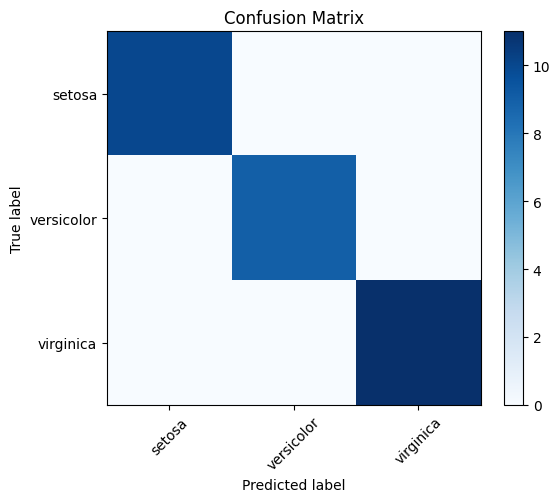

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = iris.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [26]:
# Try a decision tree with max_depth and min_samples_split
model_tuned = DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)
model_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Accuracy: {accuracy_tuned * 100:.2f}%")
class_re= classification_report(y_pred,y_test)
print(class_re)


Tuned Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
#custom checking
custom=[[1,2,34,4]]
prediction =model_tuned.predict(custom)
print(iris.target_names[prediction])

['virginica']


In [33]:
#lets check other metrics to make sure model is not fitted
scores = cross_val_score(model_tuned, X, y, cv=5, scoring='accuracy')

# Print out the results
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {np.mean(scores)}")
print(f"Standard deviation of cross-validation score: {np.std(scores)}")

Cross-validation scores: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean cross-validation score: 0.9733333333333334
Standard deviation of cross-validation score: 0.02494438257849294


**Conclusion:**
  From the model’s evaluation, we can make the following conclusions:

  Accuracy: The model achieves an accuracy of about 100%, indicating very good performance for the Iris dataset, because of simpler dataset.

  Confusion Matrix: The confusion matrix helps us see how the model is performing across different classes. We can see if the model has issues with class imbalances or misclassifications.

#Decision Tree Regressor: An Overview

A Decision Tree Regressor is a type of decision tree model used for predicting continuous numeric values, making it suitable for regression tasks. Like the Decision Tree for classification, it builds a tree structure by recursively splitting the data based on feature values, but instead of class labels, it predicts continuous outputs.
How Does a Decision Tree Regressor Work?

  **Root Node:** The process begins with the entire dataset in the root node.

  **Splitting the Data:** The algorithm recursively splits the data into subsets based on feature values. The objective is to minimize the variance in each of the resulting subsets.

  **Leaf Nodes:** Each leaf node represents a predicted value, typically the mean or median value of the target variable for that subset.

  **Decision Process:** Similar to classification trees, the algorithm considers every possible split of the data and chooses the one that minimizes a loss function (like variance reduction) to produce the most homogenous subsets possible.

**Key Metrics for Decision Tree Regressor**

  **Mean Squared Error (MSE):** Measures the average squared difference between the predicted values and the actual target values. Lower MSE indicates better performance.

  **R-squared (R²):** Represents the proportion of the variance in the target variable that is predictable from the independent variables. An R² of 1 means the model perfectly explains the variance, while 0 means it does not explain any variance.

**Advantages of Decision Tree Regressor**

  **Easy to Interpret:** Like its classification counterpart, decision trees are transparent and easy to visualize, making them intuitive to understand.

  **Non-linear Relationships:** Can model non-linear relationships between features and the target variable without requiring complex transformations of the data.

  **No Need for Feature Scaling:** Unlike other models like linear regression, decision trees do not require features to be normalized or standardized.

  **Handles Missing Data:** The algorithm can handle missing values, either by using surrogate splits or by assigning missing values to the most frequent category.

**Disadvantages of Decision Tree Regressor**

  **Overfitting:** Decision trees are prone to overfitting, especially when the tree becomes too deep. This can result in high variance and poor generalization to unseen data.

  **Instability:** Small changes in the dataset can lead to drastically different tree structures, which makes the model sensitive to noise.

  **Bias towards Features with More Categories:** Features with more possible values (e.g., numerical features) may dominate the decision-making process.

Enhancements to Improve Decision Tree Regressor

  **Pruning:** This involves cutting back the tree by removing branches that add little predictive value, which helps prevent overfitting.

  **Ensemble Methods:**

  **Random Forest:** An ensemble of multiple decision trees, each trained on a different subset of the data, improves performance by reducing variance.

  **Gradient Boosting:** Builds trees sequentially, with each tree correcting the errors of the previous one, improving accuracy.

**Example Use Case: Predicting House Prices**

Consider a dataset with features like square footage, number of bedrooms, and location, and the target variable is price. A decision tree regressor would learn to split the data based on features such that the target value (price) in each leaf node is as close as possible to the actual price of the houses in that subset.